In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/nidhi/Downloads/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_class'].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [7]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [8]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [9]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

In [10]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [11]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude','pickup_longitude', 'dropoff_latitude','dropoff_longitude', 'passenger_count', 'dist_km']

y_col = ['fare_class'] #this column contains the labels

In [12]:
for cat in cat_cols: 
    df[cat] = df[cat].astype('category')

In [13]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [14]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [15]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [16]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [17]:
df['AMorPM'].head().cat.codes

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [18]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [19]:
df['Weekday'].head().cat.codes

0    1
1    2
2    2
3    3
4    0
dtype: int8

In [20]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [21]:
cats = torch.tensor(cats, dtype = torch.int64)
cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

In [22]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [23]:
conts.type()

'torch.FloatTensor'

In [24]:
y = torch.tensor(df[y_col].values).flatten()

In [25]:
y[:5]

tensor([0, 0, 1, 0, 1])

In [26]:
cats.shape

torch.Size([120000, 3])

In [27]:
conts.shape

torch.Size([120000, 6])

In [28]:
y.shape

torch.Size([120000])

In [29]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [30]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [31]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [32]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [33]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [34]:
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[-1.2825,  0.6300,  1.3317,  0.4159, -0.6689,  0.8872, -0.5172,  1.0132,
           0.1003,  0.8143,  0.6913,  0.9294],
         [ 1.8753, -0.9256, -0.3286,  1.0606, -1.2093, -1.1959,  0.6685, -2.2680,
           0.4044, -0.4839,  0.7610, -0.0513],
         [-0.1413, -1.9413,  1.1106,  0.9824,  0.0663, -1.6681,  1.0221,  0.3817,
          -0.6727,  0.1834,  0.2906, -1.2045],
         [ 0.8888,  0.5135, -0.1380,  0.6327, -1.7780,  0.6689,  0.0277, -1.2250,
          -0.7733,  0.2573,  1.3139,  0.0979]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.0213],
         [-1.0213],
         [-1.0213],
         [-0.8376]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.3255,  2.0535,  0.4848,  0.2988],
         [-0.9301, -0.3032, -0.2768,  0.1560],
         [-0.9301, -0.3032, -0.2768,  0.1560],
         [-0.7605,  0.7091, -0.5273, -0.2343]], grad_fn=<EmbeddingBackward>)]

In [35]:
z = torch.cat(embeddingz, 1)
z


tensor([[-1.2825,  0.6300,  1.3317,  0.4159, -0.6689,  0.8872, -0.5172,  1.0132,
          0.1003,  0.8143,  0.6913,  0.9294, -1.0213, -0.3255,  2.0535,  0.4848,
          0.2988],
        [ 1.8753, -0.9256, -0.3286,  1.0606, -1.2093, -1.1959,  0.6685, -2.2680,
          0.4044, -0.4839,  0.7610, -0.0513, -1.0213, -0.9301, -0.3032, -0.2768,
          0.1560],
        [-0.1413, -1.9413,  1.1106,  0.9824,  0.0663, -1.6681,  1.0221,  0.3817,
         -0.6727,  0.1834,  0.2906, -1.2045, -1.0213, -0.9301, -0.3032, -0.2768,
          0.1560],
        [ 0.8888,  0.5135, -0.1380,  0.6327, -1.7780,  0.6689,  0.0277, -1.2250,
         -0.7733,  0.2573,  1.3139,  0.0979, -0.8376, -0.7605,  0.7091, -0.5273,
         -0.2343]], grad_fn=<CatBackward>)

In [36]:
selfembdrop = nn.Dropout(.4)

In [37]:
z = selfembdrop(z)

In [38]:
z

tensor([[-2.1375,  1.0501,  2.2195,  0.6932, -1.1148,  0.0000, -0.0000,  1.6887,
          0.0000,  1.3572,  1.1521,  1.5490, -1.7021, -0.0000,  0.0000,  0.8080,
          0.4979],
        [ 0.0000, -1.5426, -0.5476,  0.0000, -0.0000, -1.9932,  1.1142, -3.7799,
          0.6740, -0.8065,  1.2683, -0.0000, -1.7021, -1.5502, -0.5053, -0.0000,
          0.0000],
        [-0.0000, -0.0000,  0.0000,  1.6374,  0.1105, -2.7802,  1.7034,  0.6361,
         -1.1211,  0.0000,  0.0000, -0.0000, -1.7021, -0.0000, -0.5053, -0.0000,
          0.2599],
        [ 1.4814,  0.0000, -0.0000,  1.0544, -2.9634,  1.1149,  0.0462, -2.0416,
         -0.0000,  0.0000,  2.1898,  0.0000, -1.3960, -0.0000,  1.1818, -0.8788,
         -0.0000]], grad_fn=<MulBackward0>)

In [39]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [40]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [41]:
model


TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [43]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [44]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.82983238
epoch:  26  loss: 0.37778977
epoch:  51  loss: 0.33750692
epoch:  76  loss: 0.31323990
epoch: 101  loss: 0.30390865
epoch: 126  loss: 0.29265192
epoch: 151  loss: 0.28530234
epoch: 176  loss: 0.28256229
epoch: 201  loss: 0.27606690
epoch: 226  loss: 0.26899835
epoch: 251  loss: 0.26408860
epoch: 276  loss: 0.26178539
epoch: 300  loss: 0.25745133

Duration: 327 seconds


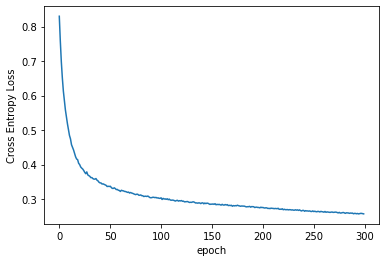

In [45]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [46]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.25063702


In [47]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.25517038


In [48]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 2.7787, -2.3593])    0      0   
tensor([-2.3199,  2.7906])    1      0   
tensor([ 2.7753, -1.3604])    0      0   
tensor([-1.9274,  1.1590])    1      1   
tensor([ 2.4167, -1.9136])    0      0   
tensor([ 1.5341, -1.6921])    0      0   
tensor([ 2.9094, -1.3705])    0      0   
tensor([-2.5065,  1.2669])    1      1   
tensor([ 1.5584, -1.5937])    0      0   
tensor([-0.5833,  0.7064])    1      1   
tensor([ 1.2828, -2.6152])    0      0   
tensor([ 1.8263, -1.2995])    0      0   
tensor([ 2.1086, -0.9027])    0      0   
tensor([-2.2677,  1.1135])    1      1   
tensor([ 1.9451, -1.9822])    0      0   
tensor([-3.7116,  1.2969])    1      1   
tensor([ 2.1437, -1.8204])    0      1   
tensor([ 3.0370, -0.8984])    0      0   
tensor([ 0.3601, -1.1765])    0      0   
tensor([ 1.7173, -2.2191])    0      0   
tensor([-2.4875,  1.8352])    1      1   
tensor([-0.5577,  0.1720])    1      1   
tensor([-3.4630,  2.4873])    1   

In [49]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareClassModel.pt')
else:
    print('Model has not been trained. Consider loading a tained model instead.')